# Information Theory

This notebook summarizes first part of [A Tutorial for Information Theory in Neuroscience](https://www.eneuro.org/content/5/3/ENEURO.0052-18.2018) (Pages 1-20), and contains the code to replicate Figures _2-6_ and _8-9(a,b)_. <u>Please refer to the paper for further information.</u>

## Contents
1. [Introduction to Information Theory](#introduction)
2. [Probability Distributions](#prob-dist)
3. [Data Binning](#data-binning)
4. [Entropy](#entropy)
5. [Joint Entropy](#joint-entropy)
6. [Conditional Entropy](#conditional-entropy)
7. [Mutual Information](#mutual-information)
8. [Transfer Entropy](#transfer-entropy)
9. [Bias in Entropy and Mutual Information](#bias)
10. [Significance Testing](#significance)

## 1. Introduction to Information Theory <a name="introduction"></a>

**Information theory (IT)** methods can capture nonlinear interactions, and **do not** require assumptions about the structure of the underlying data. How can subtle interactions among variables and the computations they perform be optimally captured? Answering this question is difficult: **neuroscience experiments involve data with noise and non-linear interactions.** <br>

In IT, one variable provides information about another variable when **knowledge of the first, on average, reduces uncertainty in the second**. `Bits` can be thought as the average number of yes/no questions required to ascertain the value of a variable. When applying an information theoretic measure of to data, the result is not a parameter in a model, but rather a number that quantifies some relationship within the data. <br>

<u>Pros:</u>
<ul style="color:green">
    <li> Model independent: When applying an information theoretic measure of to data, the result is not a parameter in a model, but rather a number that quantifies some relationship within the data. </li>
    <li> It can be applied to any mixture of data types.</li>
    <li> Information theory is capable of detecting linear and nonlinear interactions.</li>
    <li> Information theory is naturally multivariate. </li>
    <li> It produces results in general units of bits.</li>
</ul>
    
<u>Cons:</u>
<ul style="color:red">
    <li>  Parameters such as bin sizes involved in the discretization are chosen in the analysis. This choice can affect final results.</li>
</ul>

## 2. Probability Distributions <a name="prob-dist"></a>

A **probability distribution** is a distribution that describes the likelihood of certain outcomes of a random variable or a group of variables. Denoted as $p(A)$. There are two types depending on the data:

   - _Discrete data_: Probability Mass Function (PMF)
   - _Continuous data_: Probability Density Function (PDF)

<u>Note: The sum of a PMF and the integral of a PDF must equal 1. </u>
  
Systems with more than one variable can be described with a **joint probability distribution**.
If variables $A$ and $B$ are independent, $P(A, B) = P(A) \cdot P(B)$ holds. A **marginal probability distribution** represents the likelihood for the outcomes of a subset of variables in the joint distribution. It can be calculated as:
<br><br>
$$
p(A) = \sum_{B} P(A, B)
$$
<br>
 
Finally, **conditional probability distributions** describe the likelihood to obtain outcomes of certain variables assumming the other variables are known. The formula is as follows:
<br><br>
$$
p(A | B) = \frac{P(A, B)}{P(B)}
$$
<br>

## 3. Data Binning <a name="data-binning"></a>
 
The probability of a state is estimated as the total number of observations of that state, divided by the total number of observations for all states:
<br><br>
$$
p(s) = \frac{N(s)}{N_{\text{obs}}},
$$ 
<br>
 where $N(s)$ is the number of experimental observations of state $s$ (frequency distribution) and $N_{\text{obs}}$, the total number of experimental observations. This is a form of **maximum likelihood estimation**.
  
Enough observations must be performed to adequately sample the space of possible joint states. As a minimum, the number of observations must be greater than the number of possible joint states, though more observations are usually necessary to perform an information theory analysis. We must also assume stationarity in our data: probability distributions do not change over time. If data is continuous, we should transform it into discrete via binning. There are two different types:

- _Uniform width binning_ : Divide the total range of the data into $N_{\text{bins}}$ number of equal-width bins.
- _Uniform count binning_ : Divide data into $N_{\text{bins}}$ with the same number of counts.

In [1]:
import sys
sys.path.append('../')
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

np.random.seed(4321)

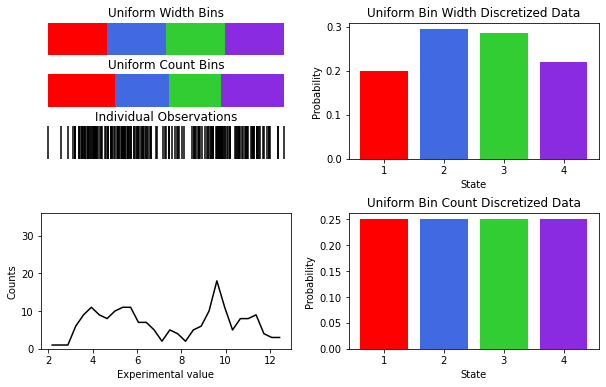

In [2]:
from information_theory.plots import plot_binnings

N = 200
dist1 = np.random.normal(5, 1.1, size=(N // 2, ))
dist2 = np.random.normal(10, 1.25, size=(N // 2, ))
data = np.concatenate([dist1, dist2])

plot_binnings(data)

## 4. Entropy <a name="entropy"></a>
**Fundamental information theory quantity**. It measures the uncertainty contained in a variable. The entropy $H(X)$ of a discrete random variable corresponds to:
<br><br>
$$
H(X) = \sum_{x \in X} p(X) \log_2 \bigg (\frac{1}{p(X)} \bigg),
$$
<br>

where $x \in X$ referes to all of the possible states x can take. The entropy of a fair coin $C$, where $p(\text{heads}) = 0.5$ and $p(\text{tails}) = 0.5$, is computed as:
<br><br>
$$
H(C) = \frac{1}{2} \log_2 \bigg (\frac{1}{\frac{1}{2}} \bigg) + \frac{1}{2} \log_2 \bigg (\frac{1}{\frac{1}{2}} \bigg) = \log_2(2) = 1
$$
<br>

For systems with probability ditributions that are more concentrated, the entropy is lower, while for systems with evenly spread probability distributions, the entropy is higher. Conversely, if a variable is equally likely to be in many different states, it has high uncertainty. Entropy will be 0 whenever a variable is perfectly concentrated. Moreover, it takes only positive values.

<u>Note: the _uniform counts binning procedure_, will produce a uniform probability distribution, which will **maximize** the entropy. </u>




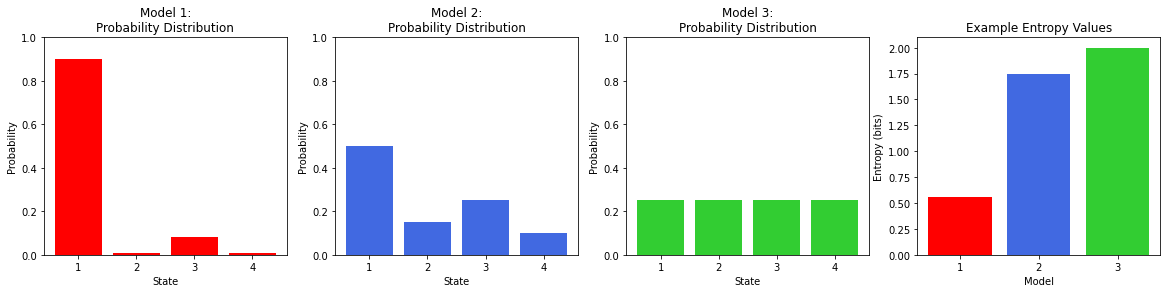

In [3]:
from information_theory.metrics import entropy
from information_theory.plots import plot_entropy

p1 = np.array([0.9, 0.01, 0.08, 0.01])
p2 = np.array([0.5, 0.15, 0.25, 0.1])
p3 = np.array([0.25, 0.25, 0.25, 0.25])

probabilities = [p1, p2, p3]
models_entropy = [
    entropy(p1), 
    entropy(p2), 
    entropy(p3)
]

plot_entropy(probabilities, models_entropy)

## 5. Joint Entropy <a name="joint-entropy"></a>
The joint entropy $H(X, Y)$ of two discrete random variables is given by:
<br><br>
$$
H(X, Y) = \sum_{x \in X, y \in Y}p(x, y)\log_2 \bigg (\frac{1}{p(x, y)} \bigg)
$$ 
<br>
For two independent coins $C_1$ and $C_2$, their joint entropy equals to:
<br><br>
$$
H(C_1, C_2) = 4 \bigg [ \frac{1}{4} \log_2 \big ( \frac{1}{\frac{1}{4}}\big ) \bigg ] = \log_2 (4) = 2
$$
<br>
In general, when the $X$ and $Y$ variable are independent, the joint probability entropy of the two variables is just the sum of the individual entropies.

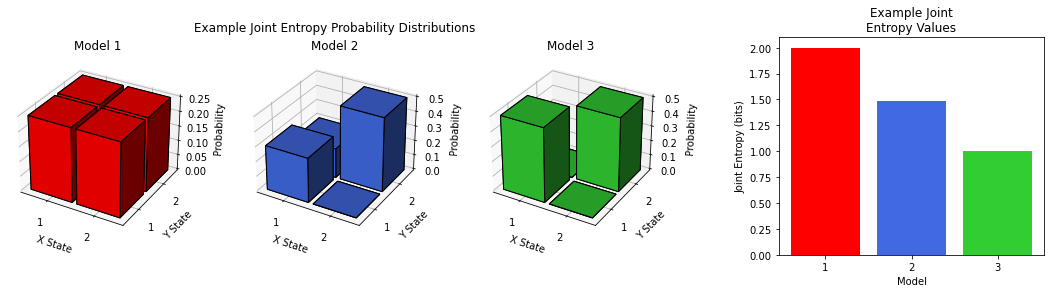

In [4]:
from information_theory.metrics import joint_entropy
from information_theory.plots import plot_joint_entropy

p1 = np.array([[0.25, 0.25], [0.25, 0.25]])
p2 = np.array([[0.3, 0], [0.2, 0.5]])
p3 = np.array([[0.5, 0], [0, 0.5]])

probabilities = [p1, p2, p3]
models_joint_entropy = [
    joint_entropy(p1), 
    joint_entropy(p2), 
    joint_entropy(p3)
]

plot_joint_entropy(probabilities, models_joint_entropy)

## 6. Conditional Entropy <a name="conditional-entropy"></a>
The **conditional entropy** quantifies the average uncertainty in a variable given the state of another variable. The conditinal entropy of two discrete random variables, $H(X|Y)$ is given by:
<br><br>
$$
H(X|Y) = \sum_{x \in X, y \in Y}p(x, y)\log_2 \bigg (\frac{1}{p(x | y)} \bigg)
$$
<br>

The conditional entropy between two fair coins $C_1$ and $C_2$ equals to:
<br><br>
$$
H(C_1|C_2) = 4 \bigg [ \frac{1}{4} \log_2 \big ( \frac{1}{\frac{1}{2}}\big ) \bigg ] = \log_2 (2) = 1
$$
<br>
Because the coins are independent, the conditional entropy of the first coin given the second coin should be the same as the entropy of the first coin alone. The relationship between entropy, joint entropy and conditional entropy can be written as:
<br><br>
$$
H(X,Y) = H(X) + H(Y|X),
$$
<br>
regardless $X$ and $Y$ are independent or not.

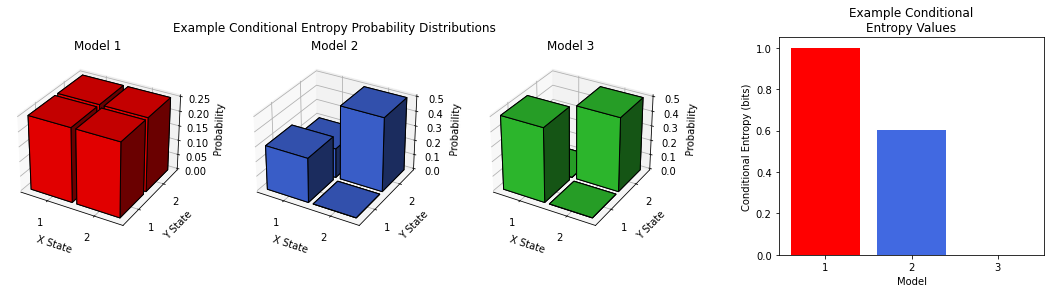

In [5]:
from information_theory.metrics import conditional_entropy
from information_theory.plots import plot_conditional_entropy

p1 = np.array([[0.25, 0.25], [0.25, 0.25]])
p2 = np.array([[0.3, 0], [0.2, 0.5]])
p3 = np.array([[0.5, 0], [0, 0.5]])

probabilities = [p1, p2, p3]
models_conditional_entropy = [
    conditional_entropy(p1), 
    conditional_entropy(p2), 
    conditional_entropy(p3)
]

plot_conditional_entropy(probabilities, models_conditional_entropy)

## 7. Mutual Information <a name="mutual-information"></a>

If learning the state of one variable reduces our uncertainty in another variable on average, then the first variable provides information about the second variable. Mutual information betwen two random variables $X$ and $Y$, denoted as $I(X; Y)$, can be computed as:
<br><br>
$$
I(X; Y) = H(X) - H(X|Y) =  \sum_{x \in X, y \in Y}p(x, y)\log_2 \bigg (\frac{p(x, y)}{p(x)(y)} \bigg)
$$
<br>
For independent variables, the argument of the logarithm becomes one for all states, which produces an information of zero. This agrees with the intutition, because independent variables, cannot provide information about each other.
<br>

Mutual information is symmetric: $I(X; Y) = I(Y; X)$. In other words, the information $Y$ provides about $X$ is equal to the information X provides about Y. <br>

It is natural to expand mutual information to systems of three or more variables. For instance, we might ask how much information two neurons provide about a stimulus or behavior together instead of individually. The most straightforward method for measuring the information between three variables is to use mutual information between two variables, but make one of the two variables a joint variable of two variables: <br><br>
<br><br>
$$
I({X_1, X_2}; Y) = H(X) - H(X|Y) =  \sum_{x_1 \in X_1, x_2 \in X_2, y \in Y}p(x_1, x_2, y)\log_2 \bigg (\frac{p(x_1, x_2, y)}{p(x_1, x_2)p(y)} \bigg)
$$
<br>

Also, we can expand it by considering the mutual information between two variables conditioned on a third variable, which is known as conditioned mutual information. It allows us to examine interactions between two variables, while taking into account the effects of a third variable. It is helpful when examining causal relations.
<br><br>
$$
I(X; Y | Z) = H(X|Z) - H(X|Y, Z) =  \sum_{x \in X, y \in Y, z \in Z}p(x, y, z)\log_2 \bigg (\frac{p(x, y | z)}{p(x|z)p(y|z)} \bigg)
$$
<br>


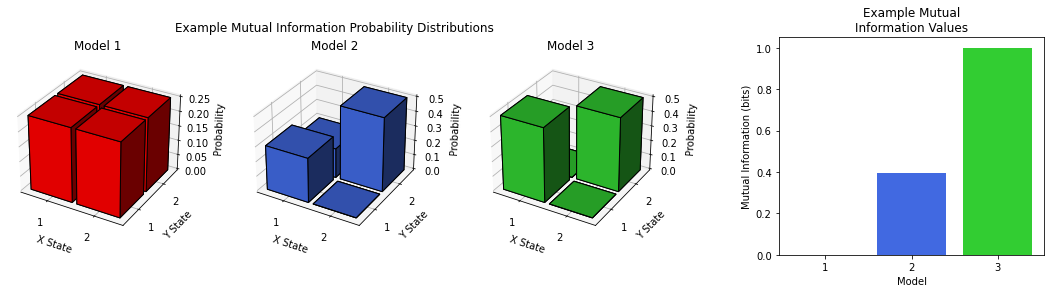

In [6]:
from information_theory.metrics import mutual_information_from_table
from information_theory.plots import plot_mutual_information

p1 = np.array([[0.25, 0.25], [0.25, 0.25]])
p2 = np.array([[0.3, 0], [0.2, 0.5]])
p3 = np.array([[0.5, 0], [0, 0.5]])

probabilities = [p1, p2, p3]
models_mutual_information = [
    mutual_information_from_table(p1),
    mutual_information_from_table(p2),
    mutual_information_from_table(p3)
]

plot_mutual_information(probabilities, models_mutual_information)

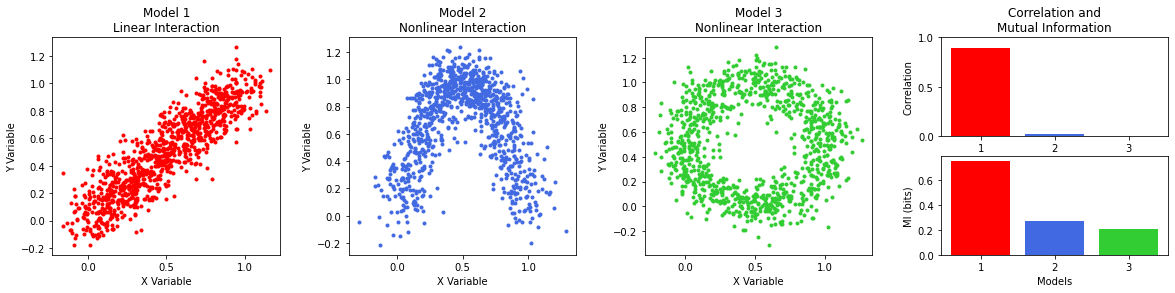

In [7]:
from information_theory.metrics import mutual_information_from_data
from information_theory.plots import plot_linear_and_nonlinear

f1 = lambda x: x
f2 = lambda x: - 4 * (x - 0.5) ** 2 + 1

N = 1000
x = np.random.random(size=(N, ))

mean_linear, std_linear = 0, 0.1
X_linear = x + np.random.normal(mean_linear, std_linear, size=(N,))
Y_linear = f1(x) + np.random.normal(mean_linear, std_linear, size=(N,))

mean_nonlinear1, std_nonlinear1 = 0, 0.1
X_nonlinear1 = x + np.random.normal(mean_nonlinear1, std_nonlinear1, size=(N,))
Y_nonlinear1 = f2(x) + np.random.normal(mean_nonlinear1, std_nonlinear1, size=(N,))

radius = 0.5
theta = x * 2 * np.pi
mean_nonlinear1, std_nonlinear2 = 0, 0.2
X_nonlinear2 = radius * (np.cos(theta) + np.random.normal(mean_nonlinear1, std_nonlinear2, size=(N, )) + 1)
Y_nonlinear2 = radius * (np.sin(theta) + np.random.normal(mean_nonlinear1, std_nonlinear2, size=(N, )) + 1)

data = [
    (X_linear, Y_linear),
    (X_nonlinear1, Y_nonlinear1),
    (X_nonlinear2, Y_nonlinear2),
]

models_correlations = [
    np.corrcoef(X_linear, Y_linear)[0, 1],
    np.corrcoef(X_nonlinear1, Y_nonlinear1)[0, 1],
    np.corrcoef(X_nonlinear2, Y_nonlinear2)[0, 1]
]

models_mutual_information = [
    mutual_information_from_data(X_linear, Y_linear, 4),
    mutual_information_from_data(X_nonlinear1, Y_nonlinear1, 4),
    mutual_information_from_data(X_nonlinear2, Y_nonlinear2, 4),
]

plot_linear_and_nonlinear(data, models_correlations, models_mutual_information)

## 8. Transfer Entropy <a name="transfer-entropy"></a>
Transfer entropy measures the information about the future state of a variable ($Y_{\text{future}}$) provided by another variable in the past ($X_{\text{past}}$) given the information provided by the past state of the variable ($Y_{\text{past}}$).
<br><br>
$$
TE(X \rightarrow Y) = I(Y_{\text{future}}; X_{\text{past}} | Y_{\text{past}}) = H(Y_{\text{future}} | Y_{\text{past}}) - H(Y_{\text{future}}|X_{\text{past}}, Y_{\text{past}}) = \sum_{y_f \in Y_{\text{future}}, x_p \in X_{\text{past}}, y_p \in Y_{\text{past}}} p(y_f, x_p, y_p)\log_2 \bigg (\frac{p(y_f, x_p | y_p)}{p(y_f| y_p) p(y_f|x_p)} \bigg)
$$ <br>
Transfer entropy is simply conditional mutual information with certain assumptions about temporal order and variable source, which allows it to serve as a measure of causal inference.

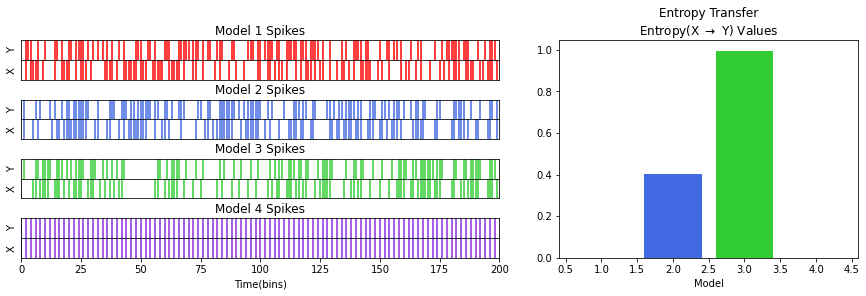

In [8]:
from information_theory.metrics import transfer_entropy
from information_theory.plots import plot_transfer_entropy

N = 200

X1 = np.random.randint(2, size=(N, ))
Y1 = np.random.randint(2, size=(N, ))
spikes_X1, = np.where(X1 == 1)
spikes_Y1, = np.where(Y1 == 1)

X2 = np.random.randint(2, size=(N, ))
idx = np.random.choice(X2.size, size=(30, ), replace=False)
Y2 = np.concatenate([np.random.randint(2, size=(1,)), X2[:-1]])
Y2[idx] = abs(Y2[idx] - 1)
spikes_X2, = np.where(X2 == 1)
spikes_Y2, = np.where(Y2 == 1)

X3 = np.random.randint(2, size=(N, ))
Y3 = np.concatenate([np.random.randint(2, size=(1,)), X3[:-1]])
spikes_X3, = np.where(X3 == 1)
spikes_Y3, = np.where(Y3 == 1)

X4 = np.array([1 if i % 2 == 0 else 0 for i in range(N)])
Y4 = X4.copy()
spikes_X4, = np.where(X4 == 1)
spikes_Y4, = np.where(Y4 == 1)

spikes = [
    (spikes_X1, spikes_Y1),
    (spikes_X2, spikes_Y2),
    (spikes_X3, spikes_Y3),
    (spikes_X4, spikes_Y4)
]

models_transfer_entropy = [
    transfer_entropy(X1, Y1),
    transfer_entropy(X2, Y2),
    transfer_entropy(X3, Y3),
    transfer_entropy(X4, Y4)
]

plot_transfer_entropy(N, spikes, models_transfer_entropy)


## 9. Bias in Entropy and Mutual Information <a name="bias"></a>
<u>Note: Limited data tends to bias results.</u>

These biases can be understood as interplay between the inherent noise associated with any analysis using limited amounts of data and the fact that information theory metrics must be greater than or equal to zero.

In [9]:
from information_theory.biases import entropy_bias, mutual_information_bias

num_simulations = 1000
N = [10, 50, 100, 150, 250, 500, 750, 1000]

probabilities_entropy = [
    np.array([0.95, 0.04, 0.009, 0.001]),
    np.array([0.25, 0.25, 0.25, 0.25])
]

entropy_true = [
    entropy(probabilities_entropy[0]),
    entropy(probabilities_entropy[1])
]
entropy_sampled = entropy_bias(probabilities_entropy, N, num_simulations)

probabilities_mi = [
    np.array([0.25, 0.25, 0.25, 0.25]),
    np.array([0.45, 0.05, 0.05, 0.45])
]

mutual_information_true = [
    mutual_information_from_table(np.reshape(probabilities_mi[0], (2, 2))),
    mutual_information_from_table(np.reshape(probabilities_mi[1], (2, 2)))
]

mutual_information_sampled = mutual_information_bias(probabilities_mi, N, num_simulations)


100%|██████████| 1000/1000 [00:08<00:00, 123.48it/s]


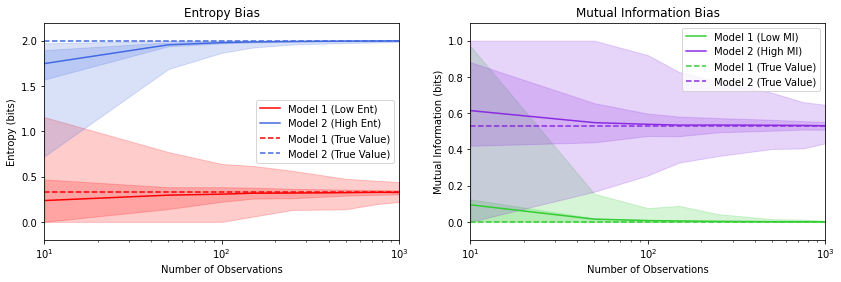

In [10]:
from information_theory.plots import plot_biases

plot_biases(N, entropy_true, entropy_sampled, mutual_information_true, mutual_information_sampled)

## 10. Significance Testing <a name="significance"></a>

A real experimental system will rarely produce an information theory measurement of precisely zero even when no interactions actually exist between the variables because of the presence of noise. In addition, bias can alter more the results. A vital step is to assess **which information theory measurements are significant**.

**Surrogate data testing** or Monte Carlo analysis is frequently the solution to significance testing in information theory analyses. This type of analysis is performed by generating surrogate null model data that preserve certain aspects of the data while randomizing other aspects. Once the information theory is applied to the surrogate data, a distribution of null model information theory values can be compared to the information theory of the real data. The proportion of null model information theory values that are found to be larger than or equal to the real-data are then taken as an estimate of the $p$-value for the information theory result from the real data.

Null model data can be created after generating probability distributions by randomizing the number of observations in joint states, while preserving the number of observations for each state of each variable. 

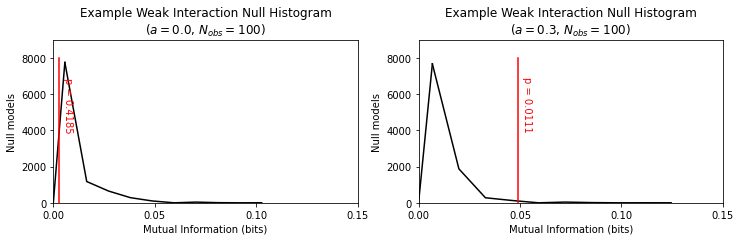

In [11]:
N_obs = 100
N_sur = 10000
states = [0, 1, 2, 3]
num_states = len(states)
num_bins = 10

A = np.array([0, 0.3])
pvalue = np.zeros((A.shape))

f, ax = plt.subplots(1, A.shape[0], figsize=(12, 3))

for i, a in enumerate(A):
    
    p_true = np.array([0.25 * (1 + a), 0.25 * (1 - a), 0.25 * (1 - a), 0.25 * (1 + a)])
    
    real_data_samples = np.random.choice(states, size=(N_obs, ), p=p_true)
    
    X = np.array([1 if state == 2 or state == 3 else 0 for state in real_data_samples])
    Y = np.array([1 if state == 1 or state == 3 else 0 for state in real_data_samples])

    joint = Counter(zip(X, Y))
    prob_dist_real = np.zeros((2, 2))

    for state, count in joint.items():
        prob_dist_real[state] = count / N_obs
        
    mi_true = mutual_information_from_table(prob_dist_real)    
    mi_samples = np.zeros((N_sur, ))

    for j in range(N_sur):
        X_perm = np.random.permutation(X)
        joint_sample = Counter(zip(X_perm, Y))
        prob_dist_sample = np.zeros((2, 2))

        for state, count in joint_sample.items():
            prob_dist_sample[state] = count / N_obs

        mi_samples[j] = mutual_information_from_table(prob_dist_sample)
        
    pvalue[i] = np.sum(mi_true < mi_samples) / N_sur
    
    width_mi, bins_mi = np.histogram(mi_samples, bins=num_bins)
    centered_bins_mi= (bins_mi[1:] + bins_mi[:-1]) / 2
    ax[i].plot(centered_bins_mi, width_mi, 'k')
    ax[i].plot([0, centered_bins_mi[0]], [0, width_mi[0]], 'k')
    ax[i].plot([mi_true, mi_true], [0, 8000], 'r')
    ax[i].text(mi_true + 0.002, 4000, f'p = {pvalue[i]}', rotation=-90, color='r')
    ax[i].set_ylim([0, 9000])
    ax[i].set_xlim([0, 0.15])
    ax[i].set_xticks([0, 0.05, 0.1, 0.15])
    ax[i].set_xlabel('Mutual Information (bits)')
    ax[i].set_ylabel('Null models')
    ax[i].set_title('Example Weak Interaction Null Histogram\n' + r'($a=' + f'{a}'+ r'$, $N_{obs}=100$)')
    
plt.show()